<a href="https://colab.research.google.com/github/sowmyatweety/cartoon-converter/blob/main/Identifing_objects.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow
from google.colab import files

In [ ]:
def read_file(filename):
  import cv2
  img = cv2.imread(filename)
  cv2_imshow(img)
  return img

Saving hand-holding-blue-water-bottle-yellow-cap-hand-holding-blue-water-bottle-yellow-cap-background-170574266.jpg to hand-holding-blue-water-bottle-yellow-cap-hand-holding-blue-water-bottle-yellow-cap-background-170574266.jpg


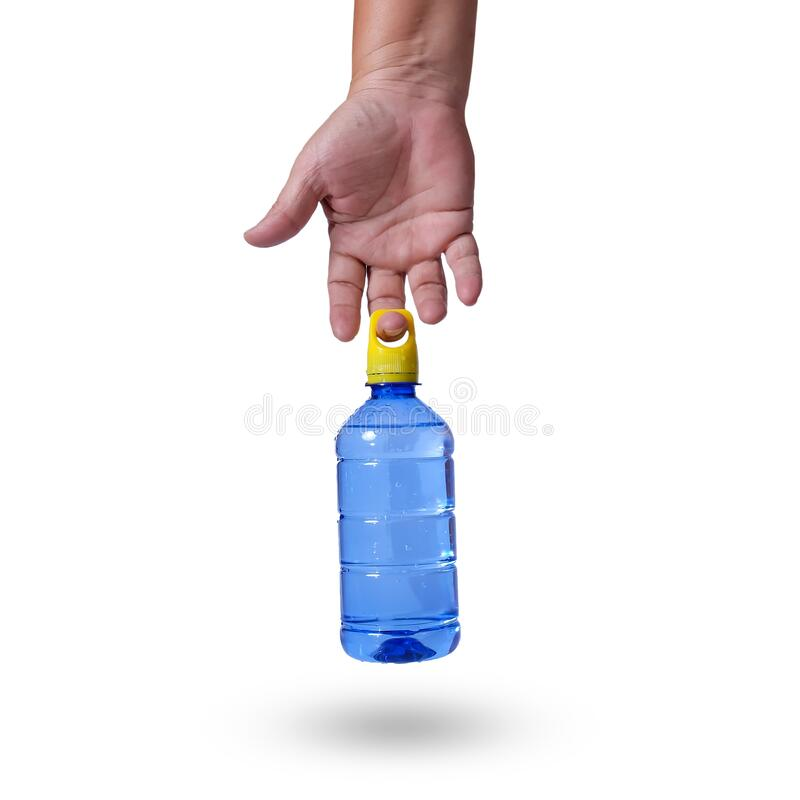

In [ ]:
uploaded = files.upload()
filename = next(iter(uploaded))
img = read_file(filename)


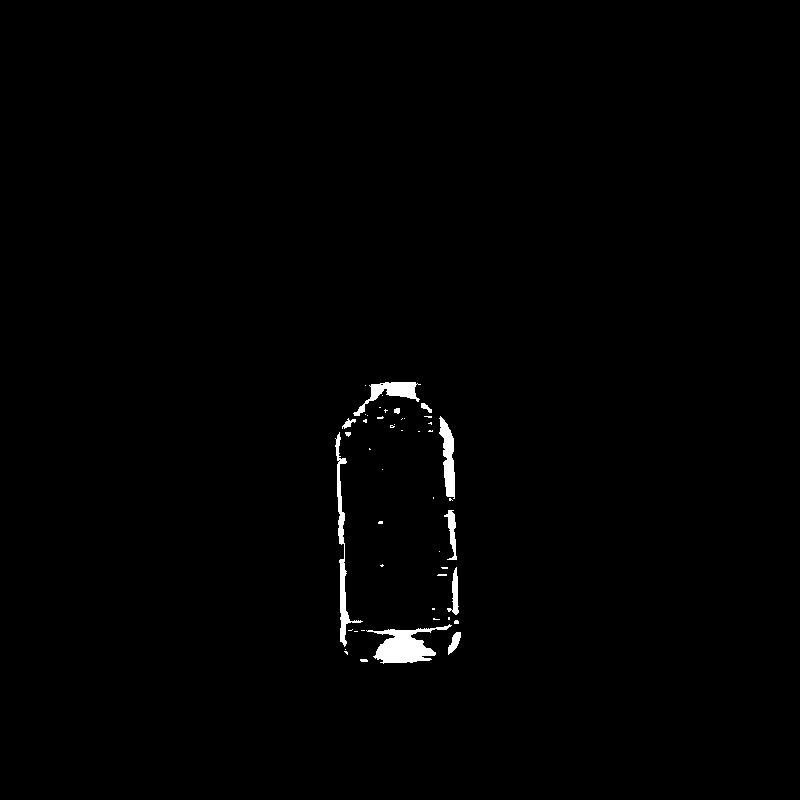

In [16]:
hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
lower_blue = np.array([110,50,50])
upper_blue = np.array([130,255,255]) 
# Threshold the HSV image to get only blue colors
mask = cv2.inRange(hsv, lower_blue, upper_blue)
cv2_imshow(mask)

In [12]:
def edge_mask(img, line_size, blur_value):
  gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
  gray_blur = cv2.medianBlur(gray, blur_value)
  edges = cv2.adaptiveThreshold(gray_blur, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY_INV, line_size, blur_value)
  return edges

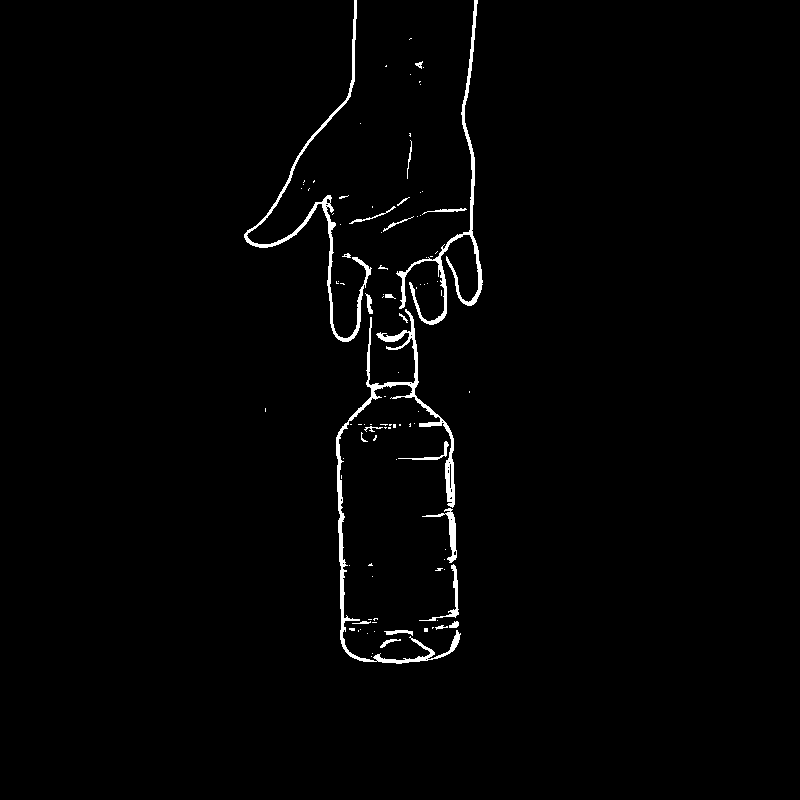

In [13]:
line_size = 7
blur_value = 7
edges = edge_mask(img, line_size, blur_value)
cv2_imshow(edges)

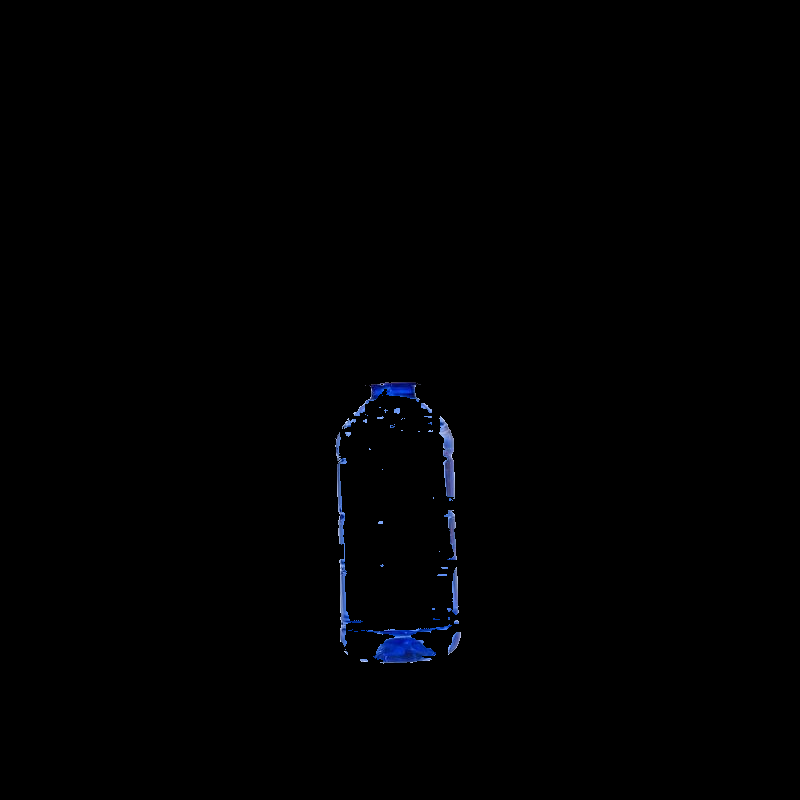

In [22]:
res = cv2.bitwise_and(img,img, mask= mask)
cv2_imshow(res)